<!-- ls *.ipynb | entr -r jupyter nbconvert 16_intro_to_python_2.ipynb --to slides --post serve --template reveal --SlidesExporter.reveal_number='c/t' --SlidesExporter.reveal_scroll=True -->

<link rel="stylesheet" type="text/css" href="16_intro_to_python_2/custom.css">

# Python for Data Science

## Python for Data Science

---

- Pandas is a Python library for data analysis
    - It provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Similar to R's `data.frame` objects.

In [20]:
from urllib.request import urlopen
import json
import pandas as pd
import plotly.express as px
from plotly.offline import plot

# Load GeoJSON for counties
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

# Load the unemployment data into a pandas DataFrame
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
    dtype={"fips": str}
)

# Create the choropleth figure
fig = px.choropleth(
    df,
    geojson=counties,
    locations='fips',
    color='unemp',
    color_continuous_scale="Viridis",  # Adjusted to use the Viridis color scale
    range_color=(0, 12),  # Set the range of the color scale
    scope="usa",
    labels={'unemp': 'Unemployment Rate', 'fips': 'FIPS Code'},
)

# Update the layout to minimize the margins

# Update the layout to minimize the margins and adjust color bar
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Unemployment Rate",
        thicknessmode="pixels", thickness=20,
        lenmode="fraction", len=0.5,
        yanchor="middle", y=0.5,
        ticks="outside", ticksuffix="%",
        dtick=2
    )
)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)
# Plot and save as .html file
plot(fig, filename='15_intro_to_python/01_choropleth_unemployment.html', auto_open=False)


'15_intro_to_python/01_choropleth_unemployment.html'

## Python Applications

---

- Web Development (Django, Flask)
- Data Analysis (Pandas, NumPy)
- Machine Learning (PyTorch, TensorFlow, scikit-learn)
- Automation and Scripting
- Scientific Computing
- Data Visualization (Matplotlib, Seaborn, Plotly)


<style>
  .full-screen-iframe {
    position: fixed !important;
    top: 0 !important;
    left: 0 !important;
    width: 100vh !important;
    border: none !important;
    margin: 0 !important;
    padding: 0 !important;
    z-index: 999999 !important;
  }
</style>

<iframe class="full-screen-iframe" src="15_intro_to_python/01_choropleth_unemployment.html"></iframe>

## Getting Started with Google Colab

---

- A beginner's guide to using Google's cloud-based Jupyter notebook environment.


<div class="two-column-layout">
  <div>
    <ul>
        <li><strong>Free access to GPUs</strong>: Useful for machine learning tasks.</li>
        <li><strong>No setup required</strong>: Write and execute code directly.</li>
        <li><strong>Easy sharing</strong>: Just like Google Docs, you can share your Colab notebooks with others.</li>
    </ul>
  </div>
  <div>
    <a href="https://colab.research.google.com" target="_blank">
      <img src="figures/Google_Colaboratory_SVG_Logo.svg" alt="Google Colaboratory Logo">
    </a>
  </div>
</div>


## Creating a New Notebook
1. Go to [Google Colab](https://colab.research.google.com).
2. Click on `New Notebook` to create a new notebook.
3. A new notebook will open with an empty cell.

You can start typing Python code directly into the cells!

## Writing and Running Code
To write and execute Python in Colab:

1. Click on a cell to start typing code.
2. Press `Shift + Enter` to run the code in the cell.
3. The output will appear right below the cell.


## Data Types and Structures

- **Integers**: Whole numbers without a fractional part.
- **Floats**: Numbers that contain a decimal point.
- **Strings**: A sequence of characters.
- **Booleans**: True or False values.

## Complex Data Structures

- **Lists**: Ordered and mutable collection of items (similar to R lists).
- **Tuples**: Ordered and immutable collection of items.
- **Dictionaries**: Unordered collection of key-value pairs (similar to R lists with named elements).
- **Sets**: Unordered collection of unique elements.


## Some examples

In [21]:
# Integers and Floats
x = 10      # Default integer
y = 2.5     # Default floating point

# Strings
name = "John Doe"

# Booleans
is_valid = True

# Lists
fruits = ["apple", "banana", "cherry"]

# Accessing list elements and printing with string interpolation
print(f"This is the first fruit: {fruits[0]}")

# Dictionaries
person = {"name": "John", "age": 30}
print(f"This is the person's name: {person['name']}")


This is the first fruit: apple
This is the person's name: John


## Indexing and Slicing

- Zero-based indexing
- Negative indices for reverse order
- Slicing to extract portions of a list

In [22]:
# Indexing
numbers = [0, 1, 2, 3, 4, 5]
print(numbers[0])   # First element
print(numbers[-1])  # Last element

# Slicing
print(numbers[2:5]) # From 3rd to 5th element
print(numbers[:3])  # First three elements
print(numbers[-3:]) # Last three elements

0
5
[2, 3, 4]
[0, 1, 2]
[3, 4, 5]


## Control Flow


In [23]:
# If-Else
x = 10
y = 20

if x > y:
    print("x is greater than y")
elif x < y:
    print("x is less than y")
else:
    print("x and y are equal")

x is less than y


## Control Structures: Looping

- `for` loops for iterating over sequences
- `while` loops for repeated execution as long as a condition is met
- Comprehensions for concise loop constructs
    - Very "Pythonic" way of writing loops

In [24]:
# List comprehension -- similar to lapply in R
squares = [x**2 for x in range(10)]
print(squares)

# Dictionary comprehension
names = ['Alice', 'Bob', 'Charlie']
name_lengths = {name: len(name) for name in names}

print(name_lengths)
print(f"Length of Alice's name: {name_lengths['Alice']}")

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
{'Alice': 5, 'Bob': 3, 'Charlie': 7}
Length of Alice's name: 5


## Functions and lambda functions

In [25]:
def add(x, y):
    return x + y

# We can call the function within an f-string!
print(f"1 + 2 = {add(1, 2)}")

1 + 2 = 3


## Working with Libraries

Google Colab comes with many popular Python libraries pre-installed, making it easy to get started with data analysis and visualization.

### Pre-installed Libraries
- **NumPy**: For numerical computing.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For creating visualizations.

### Installing Additional Libraries
If you need a library that is not pre-installed, you can install it using `pip`: Python's package manager.

In [26]:
%%script false --no-raise-error

!pip install LIBRARY_NAME

## Importing Libraries

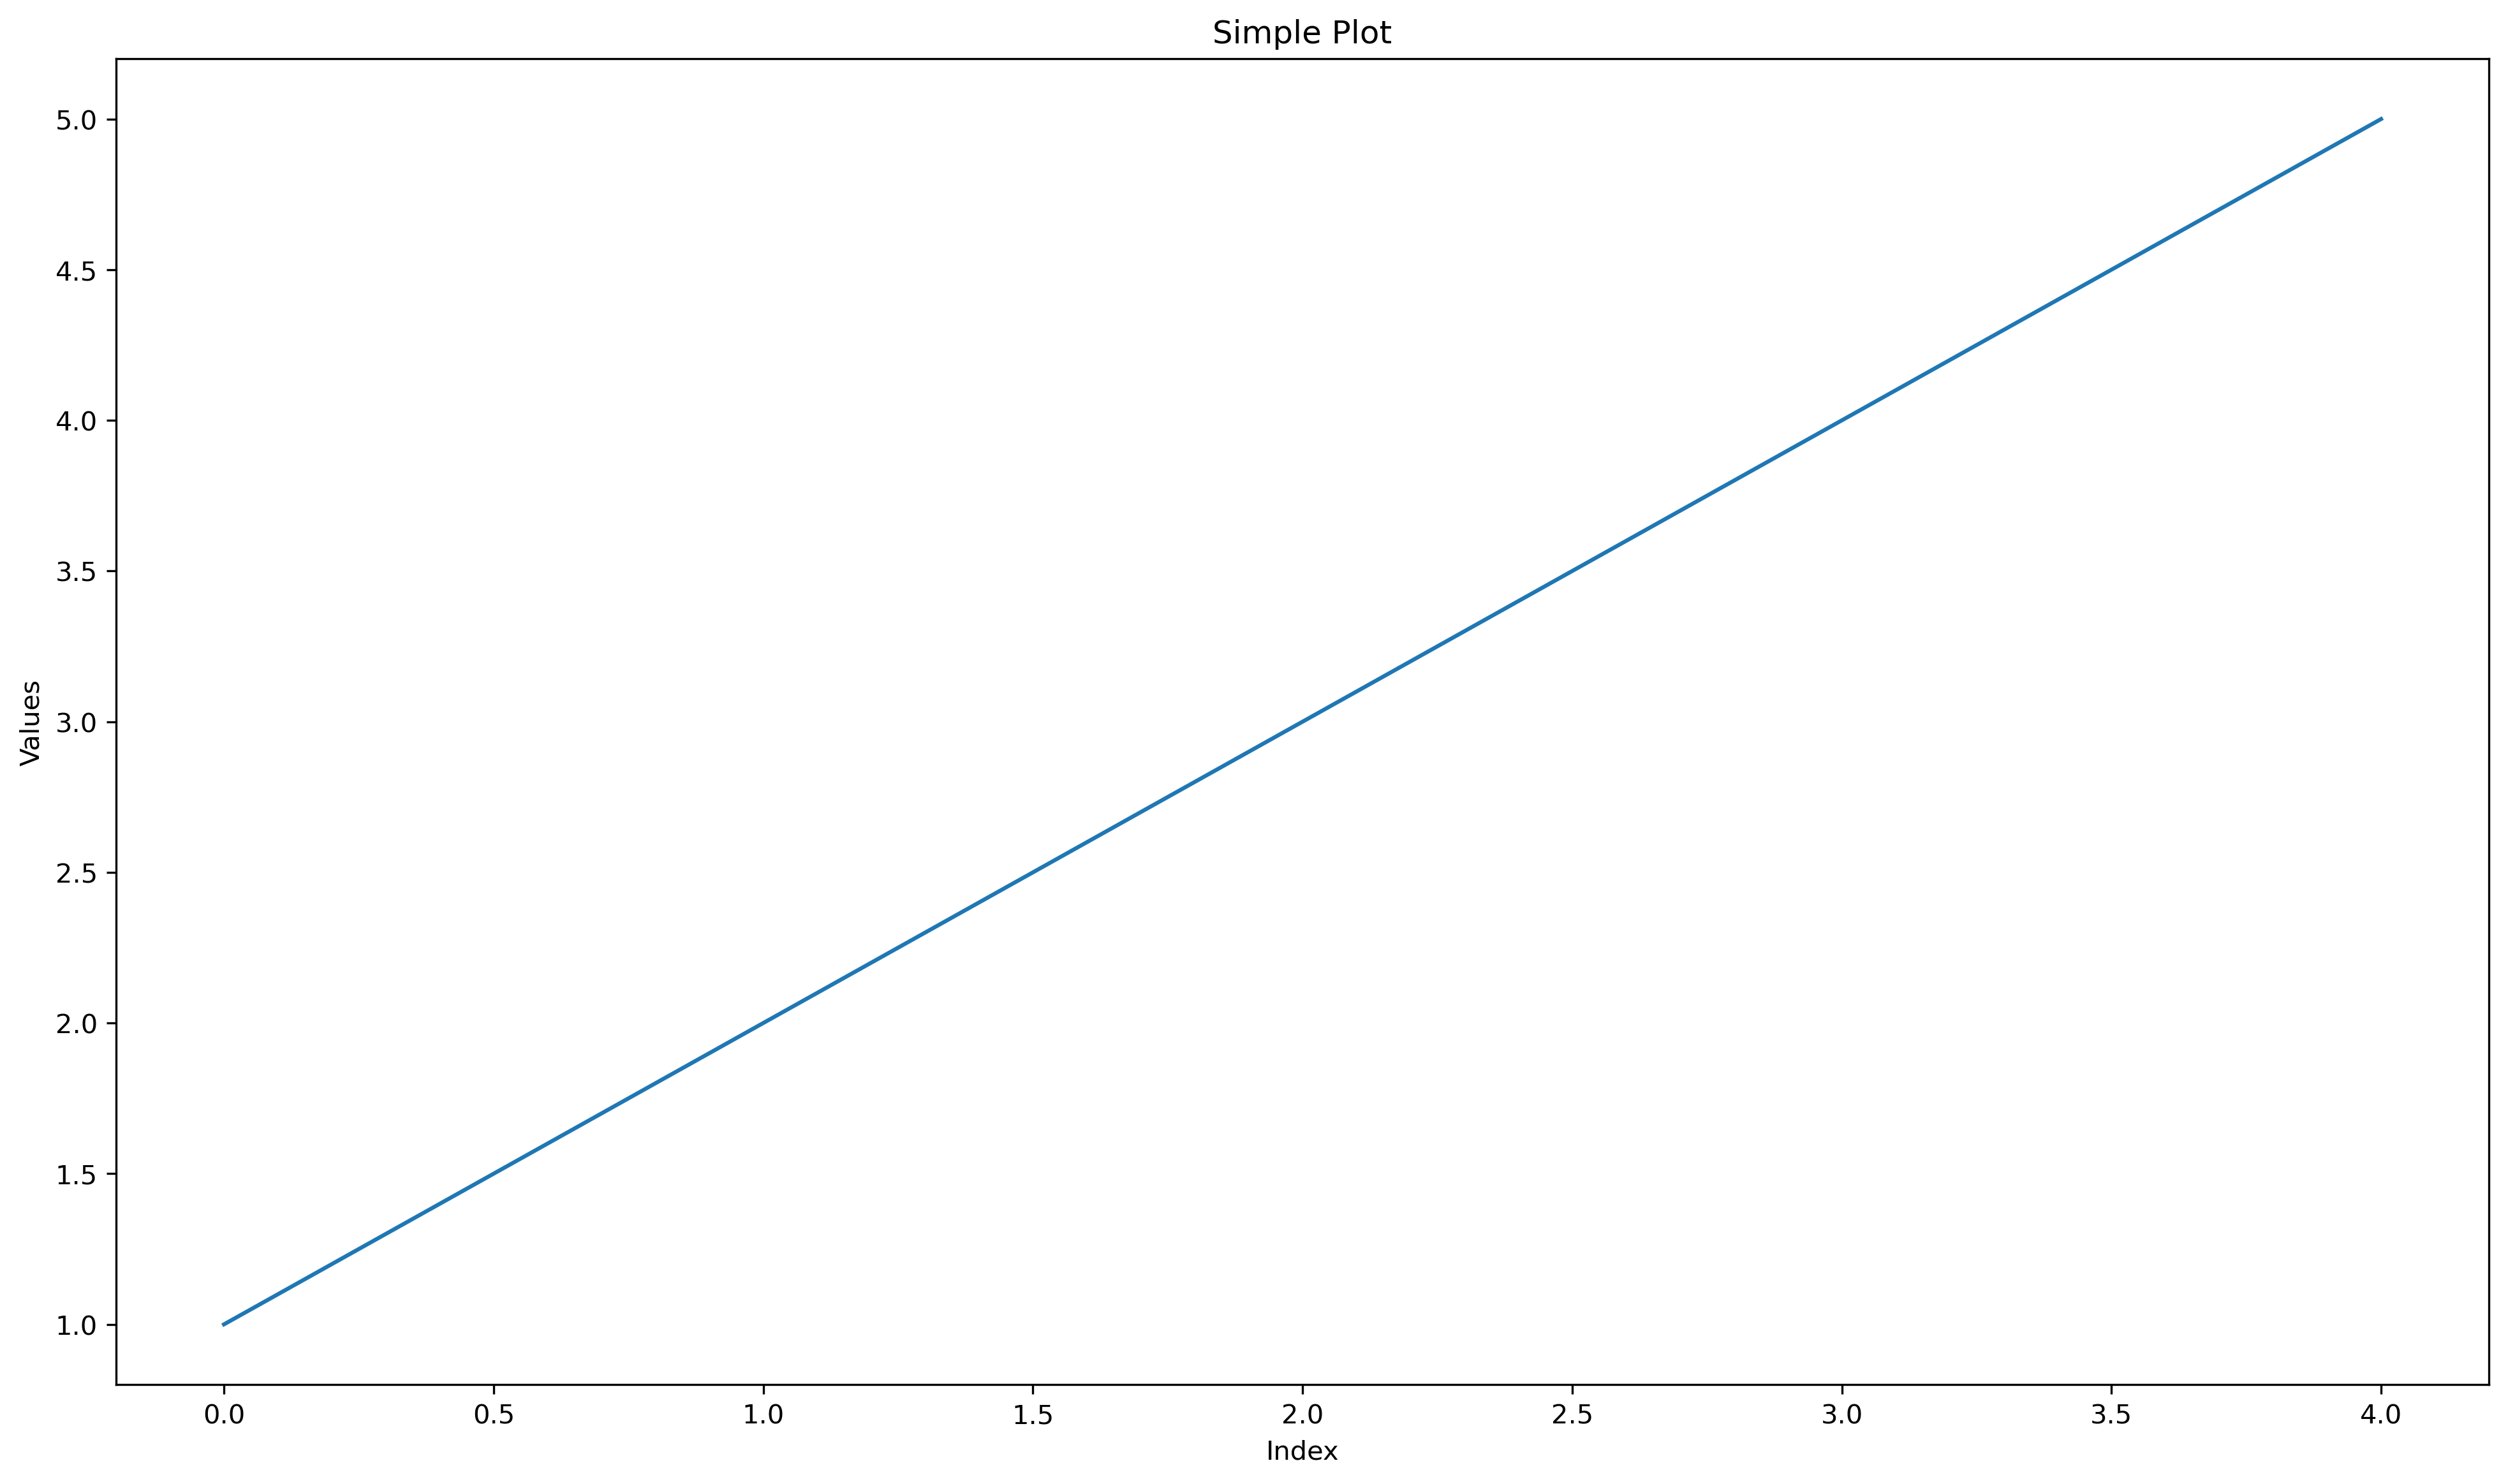

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using NumPy to create an array
arr = np.array([1, 2, 3, 4, 5])

# Creating a DataFrame with Pandas
df = pd.DataFrame(arr, columns=['Numbers'])

# Plotting with Matplotlib
plt.subplots(figsize=(16,9),dpi=300)  # Adjusted figure size to be larger
plt.plot(arr)
plt.title('Simple Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

<!-- 3in of empty space -->


<div style="height: 3in;"></div>